In [1]:
!pip install wfdb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb


In [3]:
df= pd.read_csv('/content/Updated_reference.csv')
df.sample()

,Patient_id,Label,Signal
5436,A05437,O,"[0.017, 0.018, 0.02, 0.021, 0.023, 0.032, 0.04..."


In [4]:
df.head()

,Patient_id,Label,Signal
0,A00001,N,"[-0.127, -0.162, -0.197, -0.229, -0.245, -0.25..."
1,A00002,N,"[0.128, 0.157, 0.189, 0.226, 0.25, 0.257, 0.26..."
2,A00003,N,"[0.056, 0.073, 0.085, 0.093, 0.1, 0.107, 0.113..."
3,A00004,A,"[0.519, 0.619, 0.723, 0.827, 0.914, 0.956, 0.9..."
4,A00005,A,"[-0.188, -0.239, -0.274, -0.316, -0.356, -0.37..."


In [5]:
df.Signal[0]

'[-0.127, -0.162, -0.197, -0.229, -0.245, -0.254, -0.261, -0.265, -0.268, -0.268, -0.267, -0.265, -0.263, -0.26, -0.256, -0.253, -0.249, -0.247, -0.245, -0.243, -0.241, -0.238, -0.236, -0.234, -0.232, -0.231, -0.23, -0.229, -0.229, -0.229, -0.229, -0.23, -0.23, -0.23, -0.229, -0.229, -0.227, -0.225, -0.221, -0.218, -0.215, -0.213, -0.213, -0.213, -0.212, -0.211, -0.21, -0.209, -0.206, -0.203, -0.201, -0.198, -0.198, -0.2, -0.204, -0.21, -0.216, -0.224, -0.233, -0.243, -0.253, -0.262, -0.27, -0.275, -0.281, -0.286, -0.291, -0.292, -0.289, -0.282, -0.273, -0.264, -0.259, -0.255, -0.25, -0.246, -0.241, -0.237, -0.233, -0.229, -0.226, -0.222, -0.219, -0.216, -0.213, -0.209, -0.204, -0.195, -0.187, -0.179, -0.172, -0.169, -0.166, -0.164, -0.161, -0.159, -0.157, -0.156, -0.154, -0.153, -0.153, -0.154, -0.155, -0.157, -0.159, -0.16, -0.162, -0.164, -0.166, -0.167, -0.169, -0.17, -0.171, -0.174, -0.177, -0.177, -0.171, -0.158, -0.121, -0.066, 0.011, 0.109, 0.219, 0.331, 0.434, 0.519, 0.575, 0.

In [6]:
def str_to_float_list(s):
    # Remove square brackets and split by comma
    items = s.strip('[]').split(',')
    # Convert each item to float, ignoring empty strings
    return [float(item) for item in items if item.strip() != '']

In [7]:
df.Signal = df.Signal.apply(str_to_float_list)


print(type(df.Signal[0]))

<class 'list'>


In [8]:
df['Time_dur']=df.Signal.apply(len)/300
# df.Time_dur[df.Time_dur!= 30]

In [9]:
df.head()

,Patient_id,Label,Signal,Time_dur
0,A00001,N,"[-0.127, -0.162, -0.197, -0.229, -0.245, -0.25...",30.0
1,A00002,N,"[0.128, 0.157, 0.189, 0.226, 0.25, 0.257, 0.26...",30.0
2,A00003,N,"[0.056, 0.073, 0.085, 0.093, 0.1, 0.107, 0.113...",60.0
3,A00004,A,"[0.519, 0.619, 0.723, 0.827, 0.914, 0.956, 0.9...",30.0
4,A00005,A,"[-0.188, -0.239, -0.274, -0.316, -0.356, -0.37...",60.0


In [10]:
fs = 300

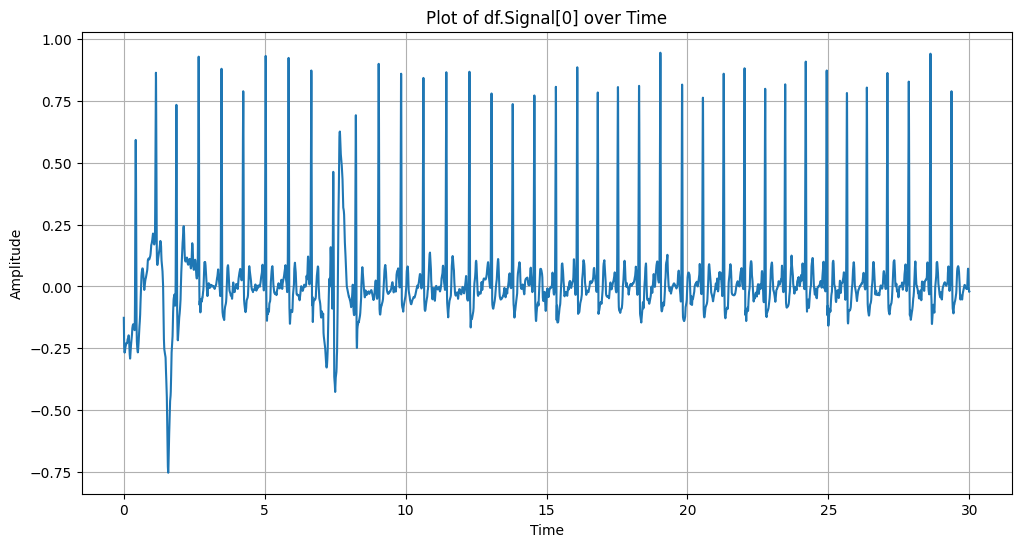

In [11]:
plt.figure(figsize=(12, 6))

# Create a time vector by dividing sample indices by the sampling rate (300)
time_vector = [i / 300 for i in range(len(df.Signal[0]))]

# Plot signal_data against the time_vector
# Changed keyword arguments x and y to positional arguments
plt.plot(time_vector, df.Signal[0])
plt.title('Plot of df.Signal[0] over Time')
plt.xlabel('Time') # Change x-axis label to Time
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Checking the lengths of Signals in data

In [12]:
# prompt: write the code to check if all the Signals are of same length

# Get the length of the first signal
first_signal_length = len(df.Signal[0])

# Check if all other signals have the same length
all_same_length = all(len(signal) == first_signal_length for signal in df.Signal)

if all_same_length:
  print("All signals have the same length.")
else:
  print("Signals do not have the same length.")

# Optionally, find signals with different lengths
different_length_indices = [i for i, signal in enumerate(df.Signal) if len(signal) != first_signal_length]
if different_length_indices:
    print("Indices of signals with different lengths:", different_length_indices)
    # You can further inspect these signals
    # for index in different_length_indices:
    #    print(f"Length of signal at index {index}: {len(df.Signal[index])}")

Signals do not have the same length.
Indices of signals with different lengths: [2, 4, 7, 9, 13, 14, 18, 27, 29, 31, 36, 42, 50, 51, 56, 57, 58, 59, 62, 64, 67, 77, 80, 82, 92, 95, 102, 104, 105, 107, 119, 127, 134, 137, 138, 140, 142, 144, 146, 156, 160, 163, 166, 172, 177, 181, 194, 200, 201, 213, 214, 220, 223, 230, 234, 235, 238, 240, 244, 249, 250, 254, 256, 257, 258, 259, 260, 263, 267, 274, 283, 284, 291, 299, 302, 303, 306, 310, 312, 313, 315, 316, 322, 324, 330, 336, 343, 352, 354, 356, 357, 367, 371, 372, 376, 378, 381, 382, 387, 388, 393, 394, 396, 401, 404, 405, 409, 410, 412, 413, 418, 424, 428, 437, 438, 440, 444, 448, 452, 453, 454, 460, 462, 463, 466, 469, 470, 473, 476, 483, 486, 488, 492, 493, 494, 503, 513, 516, 524, 525, 533, 534, 538, 543, 546, 547, 551, 554, 556, 557, 559, 561, 562, 565, 570, 571, 572, 584, 585, 586, 587, 588, 590, 591, 595, 596, 600, 601, 603, 608, 609, 610, 612, 617, 618, 619, 625, 626, 628, 629, 631, 633, 634, 639, 640, 641, 642, 647, 648, 651,

In [13]:
# prompt: give me the count of all the signals group by their length

signal_lengths = df.Signal.apply(len)
length_counts = signal_lengths.value_counts()
length_counts

,count
Signal,
9000,5977
18000,809
5834,4
4174,4
5364,4
...,...
3992,1
6282,1
8784,1


# FFT

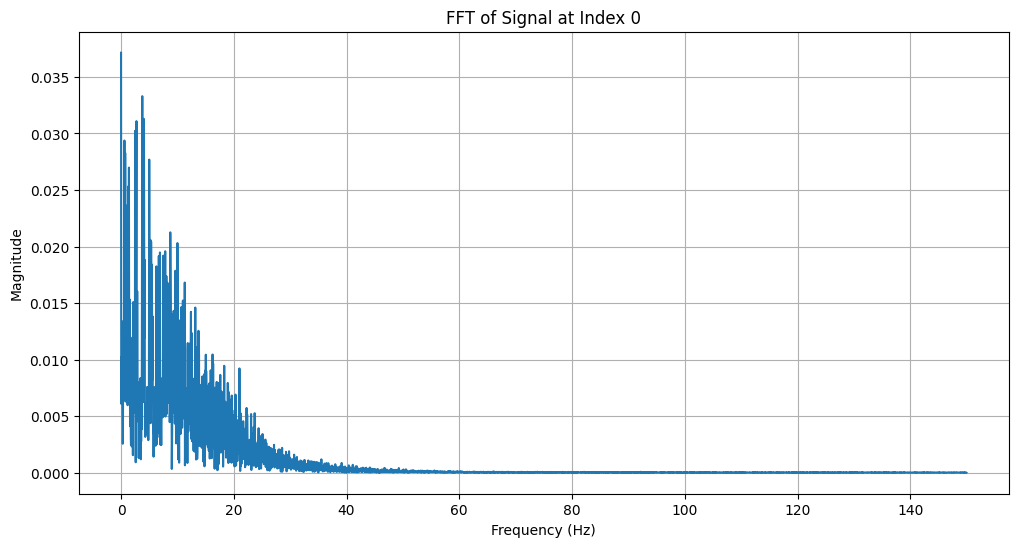

In [14]:
# prompt: define a function such as it takes index of Signal column as an argument and applies fast fourier transform on it and then plots it

from scipy.fft import fft, fftfreq

def plot_fft(signal_index):
  """
  Applies Fast Fourier Transform (FFT) to a signal at a given index in the
  DataFrame and plots the frequency spectrum.

  Args:
    signal_index: The index of the signal in df.Signal to apply FFT on.
  """
  if signal_index < 0 or signal_index >= len(df):
    print(f"Error: Signal index {signal_index} is out of bounds.")
    return

  signal_data = df.Signal[signal_index]
  N = len(signal_data)  # Number of data points
  # Assuming a sampling rate of 300 Hz as used in previous code
  sampling_rate = 300
  T = 1.0 / sampling_rate  # Sample spacing

  # Compute FFT
  yf = fft(signal_data)
  xf = fftfreq(N, T)[:N//2] # Get the one-sided frequencies

  # Plot the magnitude of the FFT
  plt.figure(figsize=(12, 6))
  plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
  plt.title(f'FFT of Signal at Index {signal_index}')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.grid(True)
  plt.show()

# Example usage: Plot the FFT of the first signal
plot_fft(0)
# plot_fft(23)

# Extract FFT features

In [15]:
from scipy.fft import fft, fftfreq

def extract_fft_features(signal_index, sampling_rate=300):
    """
    Extracts numerical FFT-based features from the ECG signal at the given index in df.Signal.

    Args:
        signal_index (int): Index of the ECG signal in df.Signal.
        sampling_rate (int): Sampling rate of the ECG signal (default = 300 Hz).

    Returns:
        dict: A dictionary containing FFT-based features.
    """
    if signal_index < 0 or signal_index >= len(df):
        print(f"Error: Signal index {signal_index} is out of bounds.")
        return {}

    signal_data = df.Signal[signal_index]
    N = len(signal_data)
    T = 1.0 / sampling_rate

    # FFT computation
    yf = fft(signal_data)
    xf = fftfreq(N, T)[:N//2]
    mag = 2.0 / N * np.abs(yf[:N//2])

    # Select frequency band of interest (e.g., 0.5 Hz to 40 Hz)
    mask = (xf >= 0.5) & (xf <= 40)
    freqs = xf[mask]
    mags = mag[mask]

    # Extract features
    features = {
        'fft_mean_mag': np.mean(mags),
        'fft_max_mag': np.max(mags),
        'fft_freq_max_power': freqs[np.argmax(mags)],
        'fft_power_band_energy': np.sum(mags**2),
        'fft_low_freq_power_ratio': np.sum(mags[freqs < 5]) / np.sum(mags)  # <5 Hz vs total
    }

    return features


In [16]:
fft_feats = extract_fft_features(signal_index=0)
print(fft_feats)


{'fft_mean_mag': np.float64(0.004360191193641526), 'fft_max_mag': np.float64(0.033297318417924486), 'fft_freq_max_power': np.float64(3.7666666666666657), 'fft_power_band_energy': np.float64(0.055690626346075855), 'fft_low_freq_power_ratio': np.float64(0.29541815712364355)}


# DWT

In [17]:
import matplotlib.pyplot as plt
import pywt
import numpy as np

def plot_dwt_coeffs_with_freq(signal, fs, wavelet='db4', level=5, title_prefix='DWT'):
    """
    Decomposes a signal using DWT and plots approximation and detail coefficients,
    including the frequency range for each level.

    Parameters:
        signal       : 1D numpy array, the input signal (e.g., ECG)
        fs           : Sampling frequency of the signal (Hz)
        wavelet      : str, wavelet type (e.g., 'db4')
        level        : int, number of decomposition levels
        title_prefix : str, prefix for subplot titles
    """
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    freq_bands = []

    # Approximation (lowest frequency)
    freq_bands.append((0, fs / 2**(level + 1)))

    # Details: from level to 1
    for i in range(level, 0, -1):
        f_high = fs / 2**i
        f_low = fs / 2**(i + 1)
        freq_bands.append((f_low, f_high))

    labels = [f"A{level}"] + [f"D{l}" for l in range(level, 0, -1)]

    plt.figure(figsize=(12, 2 * (level + 1)))
    for i, (coeff, label, (f_low, f_high)) in enumerate(zip(coeffs, labels, freq_bands)):
        plt.subplot(level + 1, 1, i + 1)
        plt.plot(coeff, color='b')
        plt.title(f"{title_prefix} - {label}  |  {f_low:.2f}–{f_high:.2f} Hz")
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.grid(True)

    plt.tight_layout()
    plt.show()


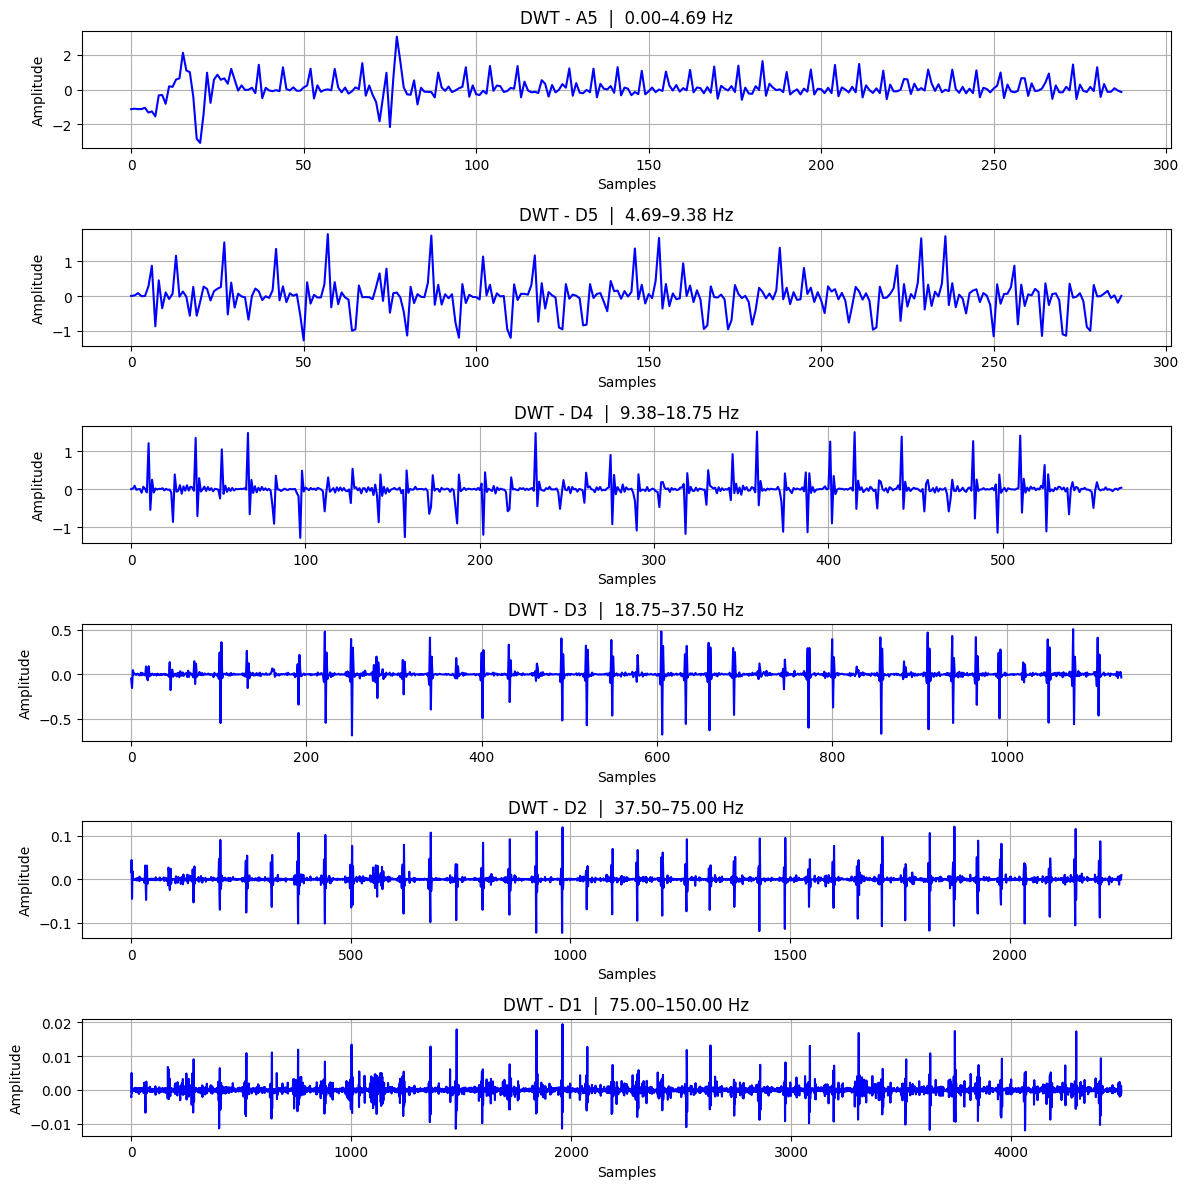

In [18]:
plot_dwt_coeffs_with_freq(df.Signal[0], 300)

# Inverse DWT


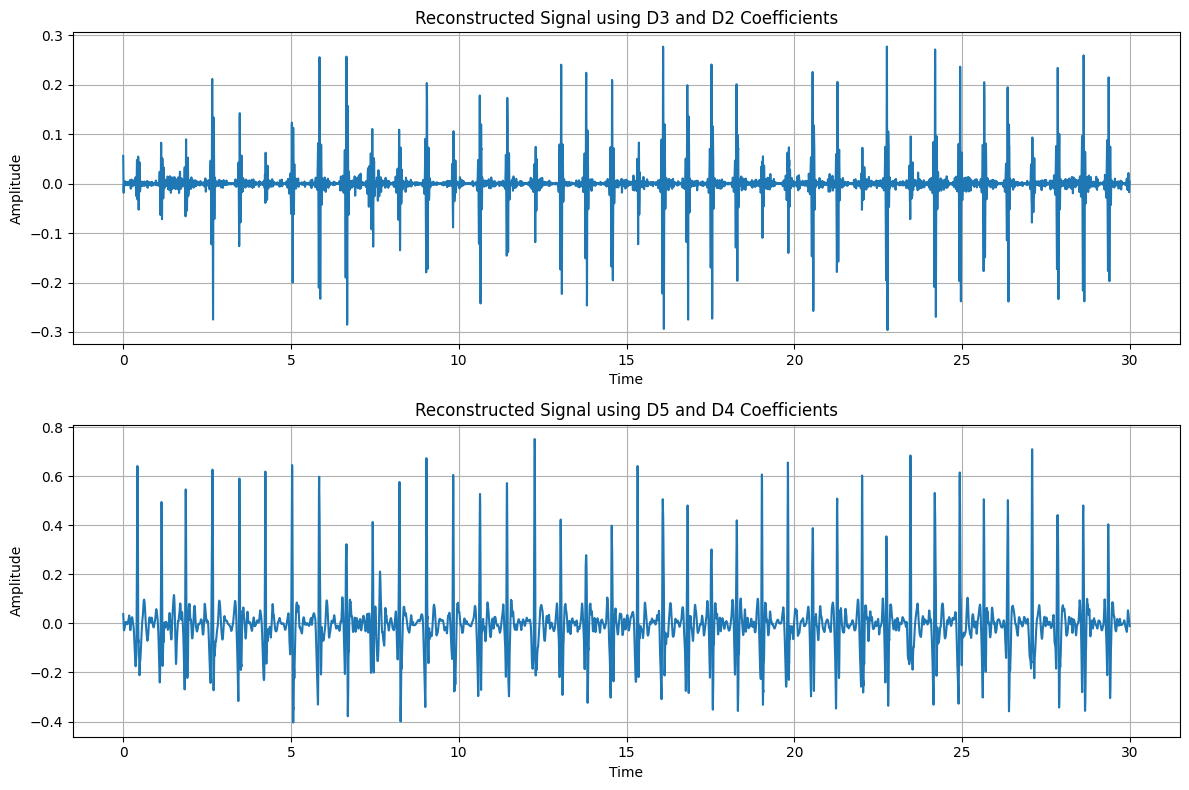

In [19]:
# prompt: use inverse dwt to reconstruct one signal with just D2+D3 and other with D4+D5

def reconstruct_from_coeffs(coeffs, indices, wavelet='db4'):
    """
    Reconstructs a signal from selected DWT coefficients.

    Parameters:
        coeffs    : list of numpy arrays, the coefficients from pywt.wavedec
        indices   : list of ints, indices of coefficients to use for reconstruction.
                    index 0 is the approximation (cA), 1 is the first detail (cD_n), etc.
                    e.g., [0, 1] uses A_n and D_n. To use D_n, D_{n-1}, use [1, 2].
        wavelet   : str, wavelet type

    Returns:
        numpy array, the reconstructed signal.
    """
    # Create a list of zero arrays with the same shapes as the original coefficients
    reconstruction_coeffs = [np.zeros_like(c) for c in coeffs]

    # Copy the selected coefficients into the new list
    for index in indices:
        if 0 <= index < len(coeffs):
            reconstruction_coeffs[index] = coeffs[index]
        else:
            print(f"Warning: Index {index} is out of bounds for coefficients.")

    # Reconstruct the signal from the selected coefficients
    reconstructed_signal = pywt.waverec(reconstruction_coeffs, wavelet)

    return reconstructed_signal

# Assume coeffs for df.Signal[0] have been calculated already
# Using the default level=5 from plot_dwt_coeffs_with_freq, coeffs will have 6 elements: [cA5, cD5, cD4, cD3, cD2, cD1]
# Index 0: cA5
# Index 1: cD5
# Index 2: cD4
# Index 3: cD3
# Index 4: cD2
# Index 5: cD1

# Reconstruct with D2 and D3 (indices 4 and 3 in the coeffs list)
signal_d2_d3 = reconstruct_from_coeffs(pywt.wavedec(df.Signal[0], 'db4', level=5), [3, 4])

# Reconstruct with D4 and D5 (indices 2 and 1 in the coeffs list)
signal_d4_d5 = reconstruct_from_coeffs(pywt.wavedec(df.Signal[0], 'db4', level=5), [1, 2])


# Plotting the reconstructed signals
time_vector = [i / 300 for i in range(len(signal_d2_d3))] # Assuming same length as original or similar

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time_vector, signal_d2_d3)
plt.title('Reconstructed Signal using D3 and D2 Coefficients')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_vector, signal_d4_d5)
plt.title('Reconstructed Signal using D5 and D4 Coefficients')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


# Extract DWT features

In [20]:
def extract_wavelet_features(signal, wavelet='db4', level=5):
    """
    Extracts statistical features from DWT coefficients of a signal.

    Args:
        signal (1D array): ECG signal.
        wavelet (str): Type of wavelet to use (default 'db4').
        level (int): Decomposition level (default 5).

    Returns:
        dict: A dictionary of statistical features from detail and approximation coefficients.
    """
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    features = {}

    # Coefficient names
    labels = [f"A{level}"] + [f"D{l}" for l in range(level, 0, -1)]

    for i, coeff in enumerate(coeffs):
        label = labels[i]
        features[f'{label}_mean'] = np.mean(coeff)
        features[f'{label}_std'] = np.std(coeff)
        features[f'{label}_energy'] = np.sum(np.square(coeff))
        features[f'{label}_entropy'] = -np.sum(np.square(coeff) * np.log(np.abs(coeff) + 1e-8))  # small offset to avoid log(0)

    return features


In [21]:
wavelet_features = extract_wavelet_features(df.Signal[0])
print(wavelet_features)


{'A5_mean': np.float64(0.08136044855472997), 'A5_std': np.float64(0.6587539819662385), 'A5_energy': np.float64(126.88598342747576), 'A5_entropy': np.float64(-38.651321631635476), 'D5_mean': np.float64(-0.001634406609420175), 'D5_std': np.float64(0.49691292216267385), 'D5_energy': np.float64(71.11443556719718), 'D5_entropy': np.float64(2.388660939402336), 'D4_mean': np.float64(-0.006242644681407706), 'D4_std': np.float64(0.3057180556988759), 'D4_energy': np.float64(53.20292260977107), 'D4_entropy': np.float64(5.083801171657498), 'D3_mean': np.float64(0.0007064121113411533), 'D3_std': np.float64(0.1065919909073962), 'D3_energy': np.float64(12.850819595894711), 'D3_entropy': np.float64(11.93092535157043), 'D2_mean': np.float64(-2.3023313600395387e-05), 'D2_std': np.float64(0.017068181118625816), 'D2_energy': np.float64(0.6569341244190199), 'D2_entropy': np.float64(1.7489370852019175), 'D1_mean': np.float64(-1.0255594770127432e-05), 'D1_std': np.float64(0.0017748351024908177), 'D1_energy':

# Bandpass Filter to isolate QRS

In [22]:
from scipy.signal import find_peaks, butter, filtfilt

def bandpass_filter(signal, fs, low=5, high=15):
    nyq = fs / 2
    b, a = butter(1, [low/nyq, high/nyq], btype='band')
    return filtfilt(b, a, signal)

filtered = bandpass_filter(df.Signal[0], fs)



# R-peaks Detection

In [23]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Assuming df.Signal[0] is a list or array-like ECG signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def detect_r_peaks(df, record_index, fs):
    """
    Detects and plots R-peaks in an ECG signal using adaptive thresholding.

    Parameters:
        df (DataFrame): A pandas DataFrame containing a column 'Signal' with ECG signals.
        record_index (int): Index of the record to analyze in df.
        fs (int): Sampling frequency of the ECG signal.
    """
    signal = np.array(df.Signal[record_index])

    # Adaptive thresholding based on signal statistics
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    adaptive_height = mean_val + 1.2 * std_val

    # Detect peaks using scipy's find_peaks
    peaks, properties = find_peaks(
        signal,
        height=adaptive_height,
        distance=int(0.3 * fs),
        # prominence=0.3 * np.max(signal)  # Optional tuning
    )

    # Plot the signal with detected R-peaks
    plt.figure(figsize=(12, 4))
    plt.plot(signal, label='ECG Signal')
    plt.plot(peaks, signal[peaks], 'rx', label='R-peaks')
    plt.legend()
    plt.title(f'Detected R-peaks (Record {record_index})')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


# Compute RR intervals and BPM


# HeartRate

# Rule-Based Classification

In [24]:
# import numpy as np

# rr_intervals = np.diff(peaks) / fs
# bpm = 60 / rr_intervals
# mean_bpm = np.mean(bpm)
# sdnn = np.std(rr_intervals)
# rmssd = np.sqrt(np.mean(np.diff(rr_intervals)**2))

# # Rule-based classification
# if mean_bpm > 100 and sdnn < 0.05:
#     rhythm = "Sinus Tachycardia"
# elif mean_bpm < 60 and sdnn < 0.05:
#     rhythm = "Sinus Bradycardia"
# elif rmssd > 0.1 and sdnn > 0.1:
#     rhythm = "Possible Atrial Fibrillation"
# elif 60 <= mean_bpm <= 100 and sdnn < 0.05:
#     rhythm = "Normal Sinus Rhythm"
# else:
#     rhythm = "Irregular Rhythm"

# print("Classified Rhythm:", rhythm)


In [25]:
# from scipy.signal import find_peaks
# import numpy as np # Import numpy

# # signal_d23 = IDWT(D2 + D3)
# # find_peaks returns a tuple: (peak_indices, properties_dict)
# peak_indices, _ = find_peaks(signal_d2_d3, height=np.mean(signal_d2_d3), distance= 300*0.25)

# p_peaks = []
# t_peaks = []
# # Iterate over the extracted peak indices
# for qrs_idx in peak_indices:
#     # Search 100–200ms before QRS
#     # Ensure indices are integers for slicing
#     p_start = max(0, int(qrs_idx - 0.2*300))
#     p_end = int(qrs_idx - 0.1*300)
#     p_window = signal_d4_d5[p_start : p_end]
#     if len(p_window) > 0:
#         rel_p_idx = np.argmax(p_window)
#         p_peaks.append(p_start + rel_p_idx)

#     # Search 100–400ms after QRS
#     # Ensure indices are integers for slicing
#     t_start = int(qrs_idx + 0.1*300)
#     t_end = int(qrs_idx + 0.4*300)
#     # Need to define fs or use 300 directly
#     t_window = signal_d4_d5[t_start : t_end] # Assuming fs was intended to be 300 based on context
#     if len(t_window) > 0:
#         rel_t_idx = np.argmax(t_window)
#         t_peaks.append(t_start + rel_t_idx)

# # Now p_peaks and t_peaks contain the indices of the detected P and T waves
# # You can now work with these lists of indices.
# print("Detected P wave indices:", p_peaks)
# print("Detected T wave indices:", t_peaks)

In [26]:
# import matplotlib.pyplot as plt
# import numpy as np # Ensure numpy is imported as it's used for indexing

# ecg_signal = df.Signal[0]

# # Extract the peak indices from the peaks_qrs tuple
# qrs_peak_indices = peaks_qrs[0]

# plt.figure(figsize=(12, 6)) # Add a figure size for better visualization
# plt.plot(ecg_signal, label='ECG') # Plot the entire ECG signal
# # Plot the QRS peaks using the extracted indices for x and corresponding signal values for y
# plt.plot(qrs_peak_indices, [ecg_signal[i] for i in qrs_peak_indices], 'ro', label='QRS')
# # Plot P peaks (assuming p_peaks contains indices)
# plt.plot(p_peaks, [ecg_signal[i] for i in p_peaks], 'go', label='P')
# # Plot T peaks (assuming t_peaks contains indices)
# plt.plot(t_peaks, [ecg_signal[i] for i in t_peaks], 'bo', label='T')

# plt.title('ECG Signal with Detected Peaks') # Add a title
# plt.xlabel('Sample Index') # Label x-axis
# plt.ylabel('Amplitude') # Label y-axis
# plt.legend()
# plt.grid(True) # Add a grid
# plt.show()

In [27]:
# import numpy as np
# import pywt
# import matplotlib.pyplot as plt

# def remove_dwt_levels_and_plot(signal, wavelet='db4', level=5, remove_levels=[], fs=300):
#     """
#     Removes specified DWT levels from a signal and plots the original vs filtered signal.

#     Parameters:
#     - signal (array-like): Input 1D signal
#     - wavelet (str): Wavelet type (e.g., 'db4')
#     - level (int): Maximum decomposition level
#     - remove_levels (list of int): DWT detail levels to remove (e.g., [1, 2])
#     - fs (int): Sampling frequency of the signal (Hz)

#     Returns:
#     - filtered_signal (np.ndarray): Reconstructed signal with selected levels removed
#     """
#     coeffs = pywt.wavedec(signal, wavelet, level=level)

#     # Remove selected detail levels
#     for lvl in remove_levels:
#         if 1 <= lvl <= level:
#             coeffs[lvl] = np.zeros_like(coeffs[lvl])

#     # Reconstruct signal
#     filtered_signal = pywt.waverec(coeffs, wavelet)
#     filtered_signal = filtered_signal[:len(signal)]  # Truncate if needed

#     # Time axis
#     time = np.arange(len(signal)) / fs

#     # Plot
#     plt.figure(figsize=(12, 5))
#     plt.plot(time, signal, label='Original Signal', alpha=0.7)
#     plt.plot(time, filtered_signal, label=f'Filtered (Removed D{remove_levels})', alpha=0.7)
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude')
#     plt.title('Original vs. Filtered Signal (Wavelet Denoising)')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     return filtered_signal




In [28]:
# remove_dwt_levels_and_plot(df.Signal[0], remove_levels=[])

# Classic ML


In [29]:
def extract_features(signal, fs):
    import numpy as np
    from scipy.signal import find_peaks

    signal = np.array(signal)

    # --- R-peak detection ---
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    adaptive_height = mean_val + 1.2 * std_val
    peaks, _ = find_peaks(signal, height=adaptive_height, distance=int(0.3 * fs))

    rr_intervals = np.diff(peaks) / fs  # in seconds
    bpm = 60 / rr_intervals if len(rr_intervals) > 1 else []

    # --- Features ---
    features = {
        "mean_bpm": np.mean(bpm) if len(bpm) > 0 else 0,
        "std_bpm": np.std(bpm) if len(bpm) > 0 else 0,
        "mean_rr": np.mean(rr_intervals) if len(rr_intervals) > 0 else 0,
        "std_rr": np.std(rr_intervals) if len(rr_intervals) > 0 else 0,
        "peak_count": len(peaks),
        "signal_std": np.std(signal),
        "signal_mean": np.mean(signal),
        "signal_max": np.max(signal),
        "signal_min": np.min(signal),
        "median_rr": np.median(rr_intervals) if len(rr_intervals) > 0 else 0,
        "iqr_rr": np.percentile(rr_intervals, 75) - np.percentile(rr_intervals, 25) if len(rr_intervals) > 0 else 0,
        "rmssd": np.sqrt(np.mean(np.square(np.diff(rr_intervals)))) if len(rr_intervals) > 1 else 0,
        "nni_50": np.sum(np.abs(np.diff(rr_intervals)) > 0.05),
        "nni_20": np.sum(np.abs(np.diff(rr_intervals)) > 0.02),
        "pnn50": np.mean(np.abs(np.diff(rr_intervals)) > 0.05) if len(rr_intervals) > 1 else 0,
    }
    return features


In [30]:
feature_list = []
labels = []  # You need to have a label column, e.g., df['Rhythm'] or df['AF'] for classification

for i in range(len(df)):
    features = extract_features(df.Signal[i], fs=300)
    feature_list.append(features)
    labels.append(df.Label[i])  # Change according to your label column

import pandas as pd
X = pd.DataFrame(feature_list)
y = pd.Series(labels)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib  # Import joblib for saving the model

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Save the trained model
joblib.dump(clf, 'ecg_classifier_model.pkl')

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 91  26  23   0]
 [  6 971  63   4]
 [ 19 265 185   4]
 [  2  32   8   7]]
              precision    recall  f1-score   support

           A       0.77      0.65      0.71       140
           N       0.75      0.93      0.83      1044
           O       0.66      0.39      0.49       473
           ~       0.47      0.14      0.22        49

    accuracy                           0.74      1706
   macro avg       0.66      0.53      0.56      1706
weighted avg       0.72      0.74      0.71      1706



In [32]:
# def extract_features(signal, fs=300):
#     # Ensure numpy is imported within the function if it's not guaranteed to be in the global scope
#     import numpy as np
#     from scipy.signal import find_peaks

#     signal = np.array(signal)

#     # --- R-peak detection ---
#     # Use the peak detection logic from the previous detect_r_peaks definition
#     mean_val = np.mean(signal)
#     std_val = np.std(signal)
#     adaptive_height = mean_val + 1.2 * std_val

#     # Detect peaks using scipy's find_peaks, operating directly on the 'signal' array
#     peaks, _ = find_peaks(
#         signal,
#         height=adaptive_height,
#         distance=int(0.3 * fs),
#         # prominence=0.3 * np.max(signal)  # Optional tuning
#     )

#     # Calculate RR intervals and BPM
#     rr_intervals = np.diff(peaks) / fs  # in seconds
#     # Handle the case where there are 0 or 1 peaks to avoid division by zero or empty array issues
#     bpm = 60 / rr_intervals if len(rr_intervals) > 0 else [0]


#     # --- Features ---
#     features = {
#         # Use len(bpm) > 0 for these checks
#         "mean_bpm": np.mean(bpm) if len(bpm) > 0 else 0,
#         "std_bpm": np.std(bpm) if len(bpm) > 0 else 0,
#         # Use len(rr_intervals) > 0 for these checks
#         "min_rr": np.min(rr_intervals) if len(rr_intervals) > 0 else 0,
#         "max_rr": np.max(rr_intervals) if len(rr_intervals) > 0 else 0,
#         "median_rr": np.median(rr_intervals) if len(rr_intervals) > 0 else 0,
#         # Use len(rr_intervals) > 0 for percentile calculation
#         "iqr_rr": np.percentile(rr_intervals, 75) - np.percentile(rr_intervals, 25) if len(rr_intervals) > 0 else 0,
#         # Use len(rr_intervals) > 1 for diff-based calculations
#         "rmssd": np.sqrt(np.mean(np.square(np.diff(rr_intervals)))) if len(rr_intervals) > 1 else 0,
#         "nni_50": np.sum(np.abs(np.diff(rr_intervals)) > 0.05) if len(rr_intervals) > 1 else 0,
#         "nni_20": np.sum(np.abs(np.diff(rr_intervals)) > 0.02) if len(rr_intervals) > 1 else 0,
#         "pnn50": np.mean(np.abs(np.diff(rr_intervals)) > 0.05) if len(rr_intervals) > 1 else 0,
#         "peak_count": len(peaks), # Add peak count back as a feature
#         "signal_std": np.std(signal), # Add signal stats back
#         "signal_mean": np.mean(signal),
#         "signal_max": np.max(signal),
#         "signal_min": np.min(signal)
#     }
#     return features

In [33]:
# feature_list = []
# labels = []

# for i in range(len(df)):
#     features = extract_features(df.Signal[i], fs=300)
#     feature_list.append(features)
#     labels.append(df.Label[i])

# import pandas as pd
# X = pd.DataFrame(feature_list)
# y = pd.Series(labels)


In [34]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y_encoded = le.fit_transform(y)  # Convert labels A, N, O, ~ to 0, 1, 2, 3


In [35]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Class-weighted Random Forest
# clf = RandomForestClassifier(n_estimators=300, max_depth=15, class_weight='balanced_subsample', random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred, target_names=le.classes_))
